# Menampilkan Visualisasi dan analisa data Covid-19

In [ ]:
import os
import numpy as np
import pandas as pd
import random
import seaborn as sns

import datetime as datetime
import matplotlib.dates as dates
import matplotlib.pyplot as plt

from contextlib import contextmanager
from time import time
from tqdm import tqdm


from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline

import datetime
from datetime import date

In [ ]:
df = pd.read_csv("MariSehat.csv")

In [ ]:
# Merubah format tanggal
date2=[]
for item in df['Date']:
    item2=item.split('/')
    month=int(item2[0])
    day=int(item2[1])
    year=int(item2[2])
    date2+=[datetime.date(year,month,day)]
df['Date']=date2
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
# menghapus kolom dengan semua data bernilai null dan kolom yang tidak diperlukan
data = df.drop(['City or Regency','Name','Item','Kind','Hidden','Location ISO Code',
                'Province','Country','Continent','Island','Time Zone','Special Status',
                'Total Regencies','Total Cities','Total Districts','Total Urban Villages',
                'Total Rural Villages','New Cases per Million','Total Cases per Million',
                'New Deaths per Million','Total Deaths per Million','Case Fatality Rate',
                'Case Recovered Rate','Growth Factor of New Cases','Growth Factor of New Deaths'],axis = 1)
data = data.fillna(0)
data.head()

,Date,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,Area (km2),Population,Population Density,Longitude,Latitude
0,2020-01-08,Jawa Timur,9,3,1,5,9,5,10,-6,Province,47803,40479023,846.78,112.732941,-7.723346
1,2020-01-09,Jawa Timur,0,1,23,-24,9,6,33,-30,Province,47803,40479023,846.78,112.732941,-7.723346
2,2020-01-10,Jawa Timur,0,1,14,-15,9,7,47,-45,Province,47803,40479023,846.78,112.732941,-7.723346
3,2020-01-11,Jawa Timur,0,3,8,-11,9,10,55,-56,Province,47803,40479023,846.78,112.732941,-7.723346
4,2020-01-12,Jawa Timur,0,3,1,-4,9,13,56,-60,Province,47803,40479023,846.78,112.732941,-7.723346


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16283 entries, 0 to 16282
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                16283 non-null  datetime64[ns]
 1   Location            16283 non-null  object        
 2   New Cases           16283 non-null  int64         
 3   New Deaths          16283 non-null  int64         
 4   New Recovered       16283 non-null  int64         
 5   New Active Cases    16283 non-null  int64         
 6   Total Cases         16283 non-null  int64         
 7   Total Deaths        16283 non-null  int64         
 8   Total Recovered     16283 non-null  int64         
 9   Total Active Cases  16283 non-null  int64         
 10  Location Level      16283 non-null  object        
 11  Area (km2)          16283 non-null  int64         
 12  Population          16283 non-null  int64         
 13  Population Density  16283 non-null  float64   

In [ ]:
#Memanggil data untuk level provinsi
data1 = data[data['Location Level'] != 'Country']

In [ ]:
newest = data1.drop_duplicates(subset='Location', keep="last")
newest.head()

In [ ]:
# Memanggil Data COVID 19 as per updated 9 Juli 2021
newest[newest.Location != 'Indonesia'].sort_values(by=['Total Cases'], ascending=False)

,Date,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,Area (km2),Population,Population Density,Longitude,Latitude
16253,2021-07-09,DKI Jakarta,13112,138,15022,-2048,636383,9270,527060,100053,Province,664,10846145,16334.31,106.836118,-6.204699
16257,2021-07-09,Jawa Barat,7399,160,4974,2265,440379,6008,348694,85677,Province,35378,45161325,1276.55,107.603708,-6.920432
16258,2021-07-09,Jawa Tengah,4530,202,3042,1286,285348,12562,223706,49080,Province,32801,36364072,1108.64,110.201115,-7.259097
16259,2021-07-09,Jawa Timur,2530,168,1727,635,189705,13635,160296,15774,Province,47803,40479023,846.78,112.732941,-7.723346
16263,2021-07-09,Kalimantan Timur,1021,18,433,570,83762,2003,73864,7895,Province,129067,3552191,27.52,116.468440,0.453858
16274,2021-07-09,Riau,504,16,299,189,74899,2019,67986,4894,Province,87024,6074100,69.80,101.805109,0.511648
16254,2021-07-09,Daerah Istimewa Yogyakarta,1665,44,902,719,72560,1892,54352,16316,Province,3133,3631015,1158.90,110.444878,-7.894502
16276,2021-07-09,Sulawesi Selatan,511,7,119,385,67280,1021,62671,3588,Province,46717,9426885,201.78,120.162056,-3.731081
16251,2021-07-09,Banten,514,4,49,461,61689,1457,50554,9678,Province,9663,10722374,1109.64,106.109004,-6.456736
16280,2021-07-09,Sumatera Barat,718,10,275,433,55675,1259,48840,5576,Province,42013,5519245,131.37,100.465062,-0.850253


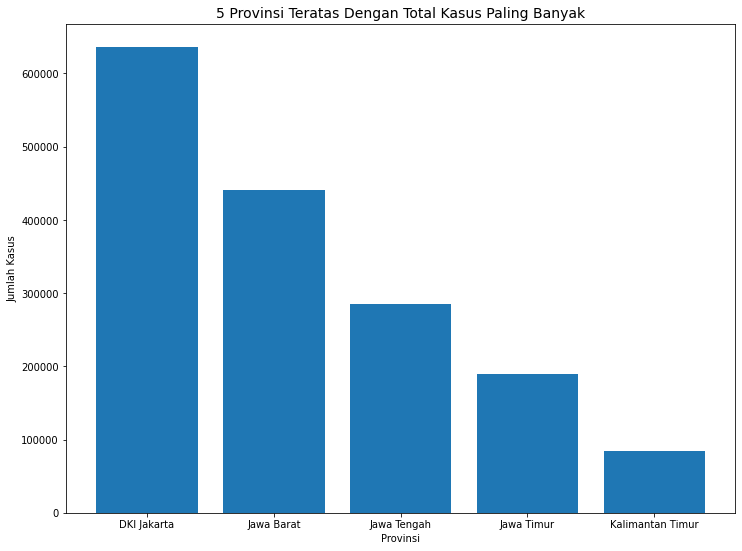

In [ ]:
# Provinsi dengan Total Kasus Terbanyak
plt.figure(figsize=(12,9))
plt.bar(newest[newest.Location != 'Indonesia'].sort_values(by=['Total Cases'], ascending=False)['Location'].values[:5], newest[newest.Location != 'Indonesia'].sort_values(by=['Total Cases'], ascending=False)['Total Cases'].values[:5])
plt.title('5 Provinsi Teratas Dengan Total Kasus Paling Banyak', fontsize=14)
plt.xlabel('Provinsi')
plt.ylabel('Jumlah Kasus')
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


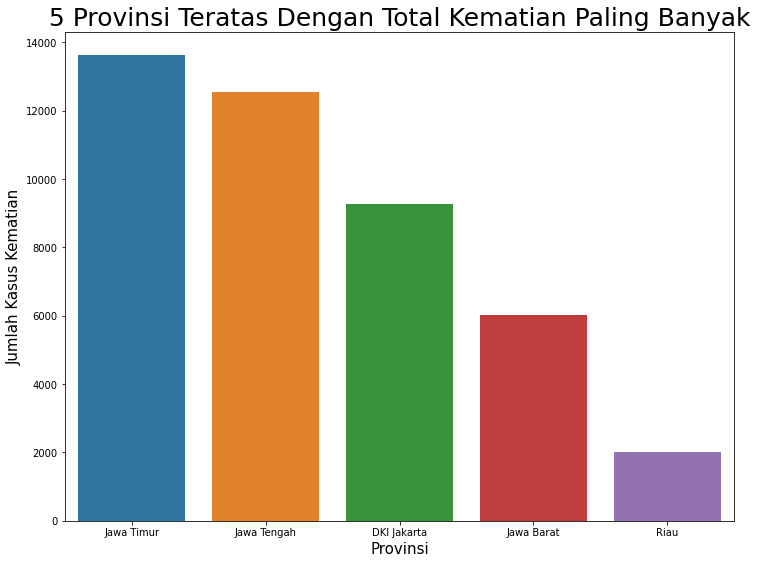

In [ ]:
# Provinsi dengan Angka Kematian Terbanyak
plt.figure(figsize=(12,9))
sns.barplot(newest[newest.Location != 'Indonesia'].sort_values(by=['Total Deaths'], ascending=False)['Location'].values[:5],  newest[newest.Location != 'Indonesia'].sort_values(by=['Total Deaths'], ascending=False)['Total Deaths'].values[:5])
plt.title('5 Provinsi Teratas Dengan Total Kematian Paling Banyak', fontsize=25)
plt.xlabel('Provinsi', fontsize=15)
plt.ylabel('Jumlah Kasus Kematian', fontsize=15)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


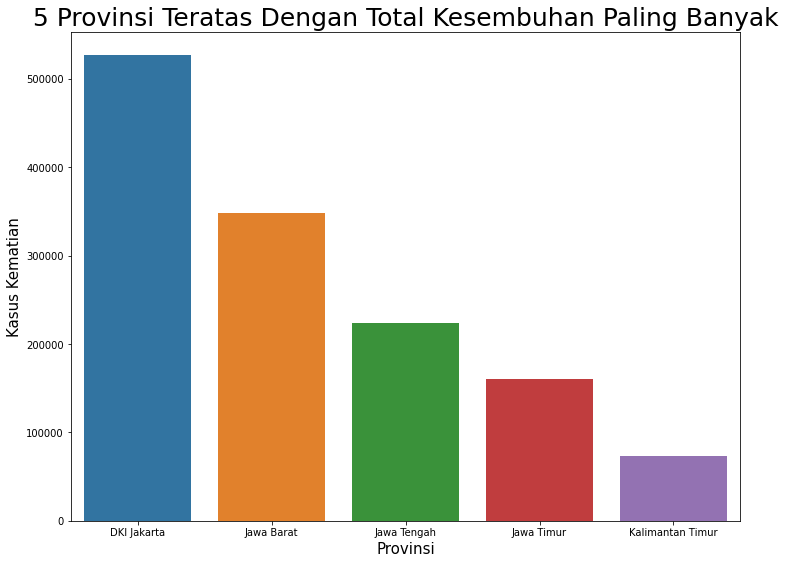

In [ ]:
# Provinsi dengan Angka Kesembuhan Terbanyak
plt.figure(figsize=(12,9))
sns.barplot(newest[newest.Location != 'Indonesia'].sort_values(by=['Total Recovered'], ascending=False)['Location'].values[:5],  newest[newest.Location != 'Indonesia'].sort_values(by=['Total Recovered'], ascending=False)['Total Recovered'].values[:5])
plt.title('5 Provinsi Teratas Dengan Total Kesembuhan Paling Banyak', fontsize=25)
plt.xlabel('Provinsi', fontsize=15)
plt.ylabel('Kasus Kematian', fontsize=15)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


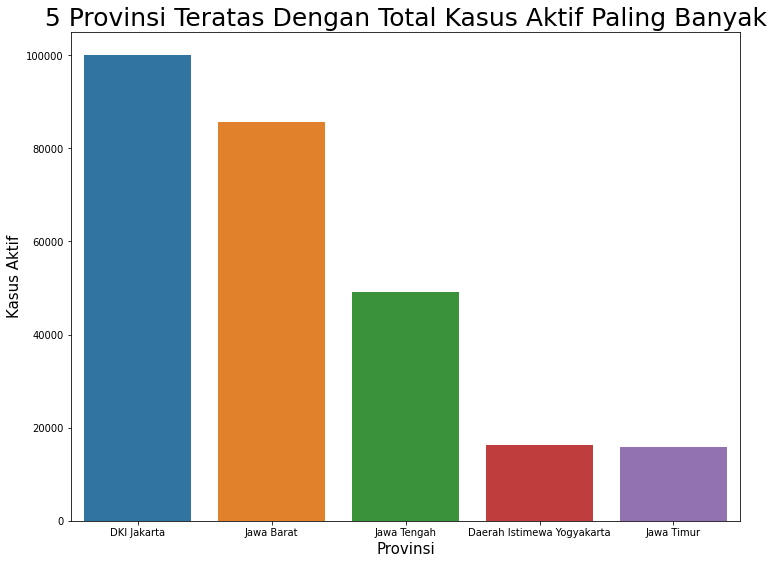

In [ ]:
# Provinsi dengan Angka Kasus Aktif Terbanyak
plt.figure(figsize=(12,9))
sns.barplot(newest[newest.Location != 'Indonesia'].sort_values(by=['Total Active Cases'], ascending=False)['Location'].values[:5],  newest[newest.Location != 'Indonesia'].sort_values(by=['Total Active Cases'], ascending=False)['Total Active Cases'].values[:5])
plt.title('5 Provinsi Teratas Dengan Total Kasus Aktif Paling Banyak', fontsize=25)
plt.xlabel('Provinsi', fontsize=15)
plt.ylabel('Kasus Aktif', fontsize=15)
plt.show()

In [ ]:
# Highlight khusus COVID 19 DKI Jakarta
jakarta = data[data.Location == 'DKI Jakarta'].tail(7).copy()
jakarta

,Date,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,Area (km2),Population,Population Density,Longitude,Latitude
16049,2021-07-03,DKI Jakarta,9701,16,5682,4003,570106,8531,479013,82562,Province,664,10846145,16334.31,106.836118,-6.204699
16083,2021-07-04,DKI Jakarta,10485,66,5816,4603,580591,8597,484829,87165,Province,664,10846145,16334.31,106.836118,-6.204699
16117,2021-07-05,DKI Jakarta,10902,120,6597,4185,591493,8717,491426,91350,Province,664,10846145,16334.31,106.836118,-6.204699
16151,2021-07-06,DKI Jakarta,9439,137,6100,3202,600932,8854,497526,94552,Province,664,10846145,16334.31,106.836118,-6.204699
16185,2021-07-07,DKI Jakarta,9365,142,3655,5568,610297,8996,501181,100120,Province,664,10846145,16334.31,106.836118,-6.204699
16219,2021-07-08,DKI Jakarta,12974,136,10857,1981,623271,9132,512038,102101,Province,664,10846145,16334.31,106.836118,-6.204699
16253,2021-07-09,DKI Jakarta,13112,138,15022,-2048,636383,9270,527060,100053,Province,664,10846145,16334.31,106.836118,-6.204699


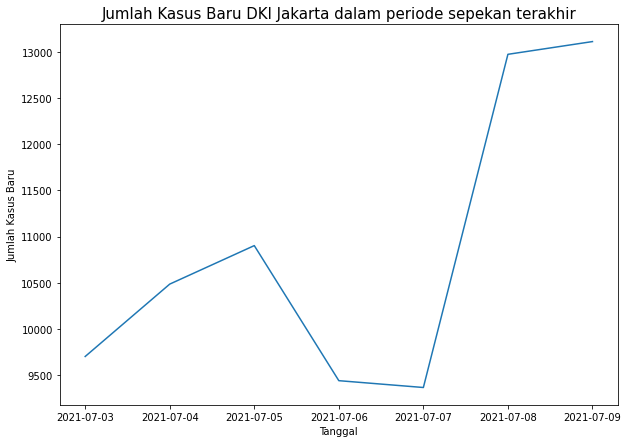

In [ ]:
#Zooming trend kasus kematian Covid di DKI Jakarta di 7 hari terakhir (sampai 9 Juli 2021)
plt.figure(figsize=(10,7))
plt.plot(jakarta['Date'].values ,jakarta['New Cases'].values)
plt.title('Jumlah Kasus Baru DKI Jakarta dalam periode sepekan terakhir', fontsize=15)
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Kasus Baru')
plt.show()

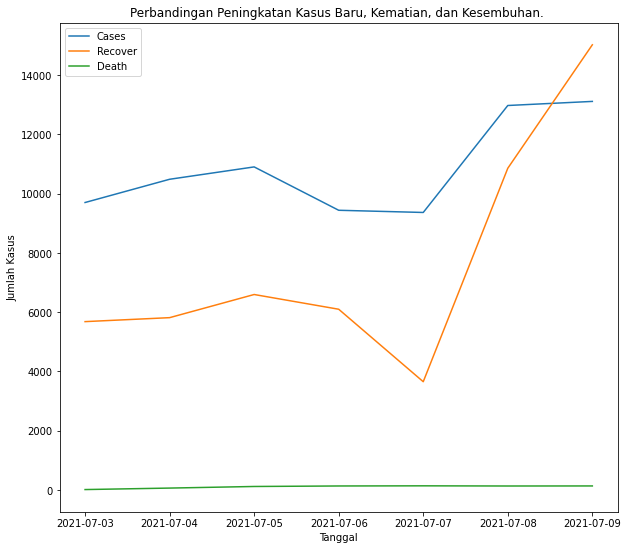

In [ ]:
# Perbandingan Peningkatan Kasus Baru, Kematian, dan Kesembuhan
plt.figure(figsize=(10,9))
plt.plot(jakarta['Date'].values ,jakarta['New Cases'].values, label='Cases')
plt.plot(jakarta['Date'].values, jakarta['New Recovered'].values, label = 'Recover')
plt.plot(jakarta['Date'].values, jakarta['New Deaths'].values, label = 'Death')
plt.title('Perbandingan Peningkatan Kasus Baru, Kematian, dan Kesembuhan. ')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Kasus')
plt.legend()
plt.show()

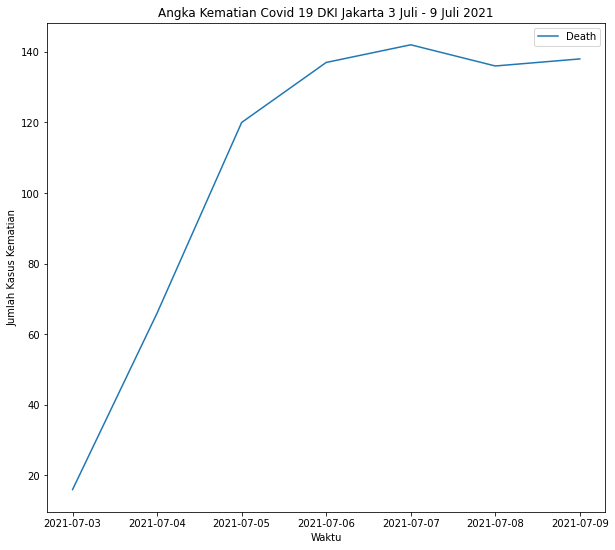

In [ ]:
# Angka Kematian Covid 19 DKI Jakarta 3 Juli - 9 Juli 2021
plt.figure(figsize=(10,9))
plt.plot(jakarta['Date'].values, jakarta['New Deaths'].values, label = 'Death')
plt.title('Angka Kematian Covid 19 DKI Jakarta 3 Juli - 9 Juli 2021')
plt.xlabel('Waktu')
plt.ylabel('Jumlah Kasus Kematian')
plt.legend()
plt.show()

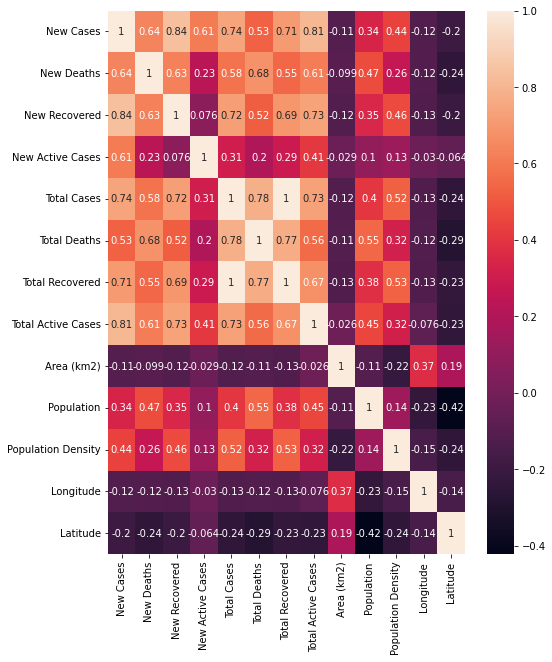

In [ ]:
#Melihat korelasi antar variabel dalam suatu heatmap
plt.figure(figsize=(8,10))
sns.heatmap(data1.corr(), annot=True)
plt.show()

In [ ]:
data1.head()

,Date,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,Area (km2),Population,Population Density,Longitude,Latitude
0,2020-01-08,Jawa Timur,9,3,1,5,9,5,10,-6,Province,47803,40479023,846.78,112.732941,-7.723346
1,2020-01-09,Jawa Timur,0,1,23,-24,9,6,33,-30,Province,47803,40479023,846.78,112.732941,-7.723346
2,2020-01-10,Jawa Timur,0,1,14,-15,9,7,47,-45,Province,47803,40479023,846.78,112.732941,-7.723346
3,2020-01-11,Jawa Timur,0,3,8,-11,9,10,55,-56,Province,47803,40479023,846.78,112.732941,-7.723346
4,2020-01-12,Jawa Timur,0,3,1,-4,9,13,56,-60,Province,47803,40479023,846.78,112.732941,-7.723346


In [ ]:
#Memfokuskan pada beberapa variable saja yang terkait dengan kasus Covid 19
data2 = data1[['New Deaths', 'New Cases','Total Cases', 'New Recovered', 'Total Recovered', 'Total Deaths','Population', 'Population Density']]
data2.head()

,New Deaths,New Cases,Total Cases,New Recovered,Total Recovered,Total Deaths,Population,Population Density
0,3,9,9,1,10,5,40479023,846.78
1,1,0,9,23,33,6,40479023,846.78
2,1,0,9,14,47,7,40479023,846.78
3,3,0,9,8,55,10,40479023,846.78
4,3,0,9,1,56,13,40479023,846.78


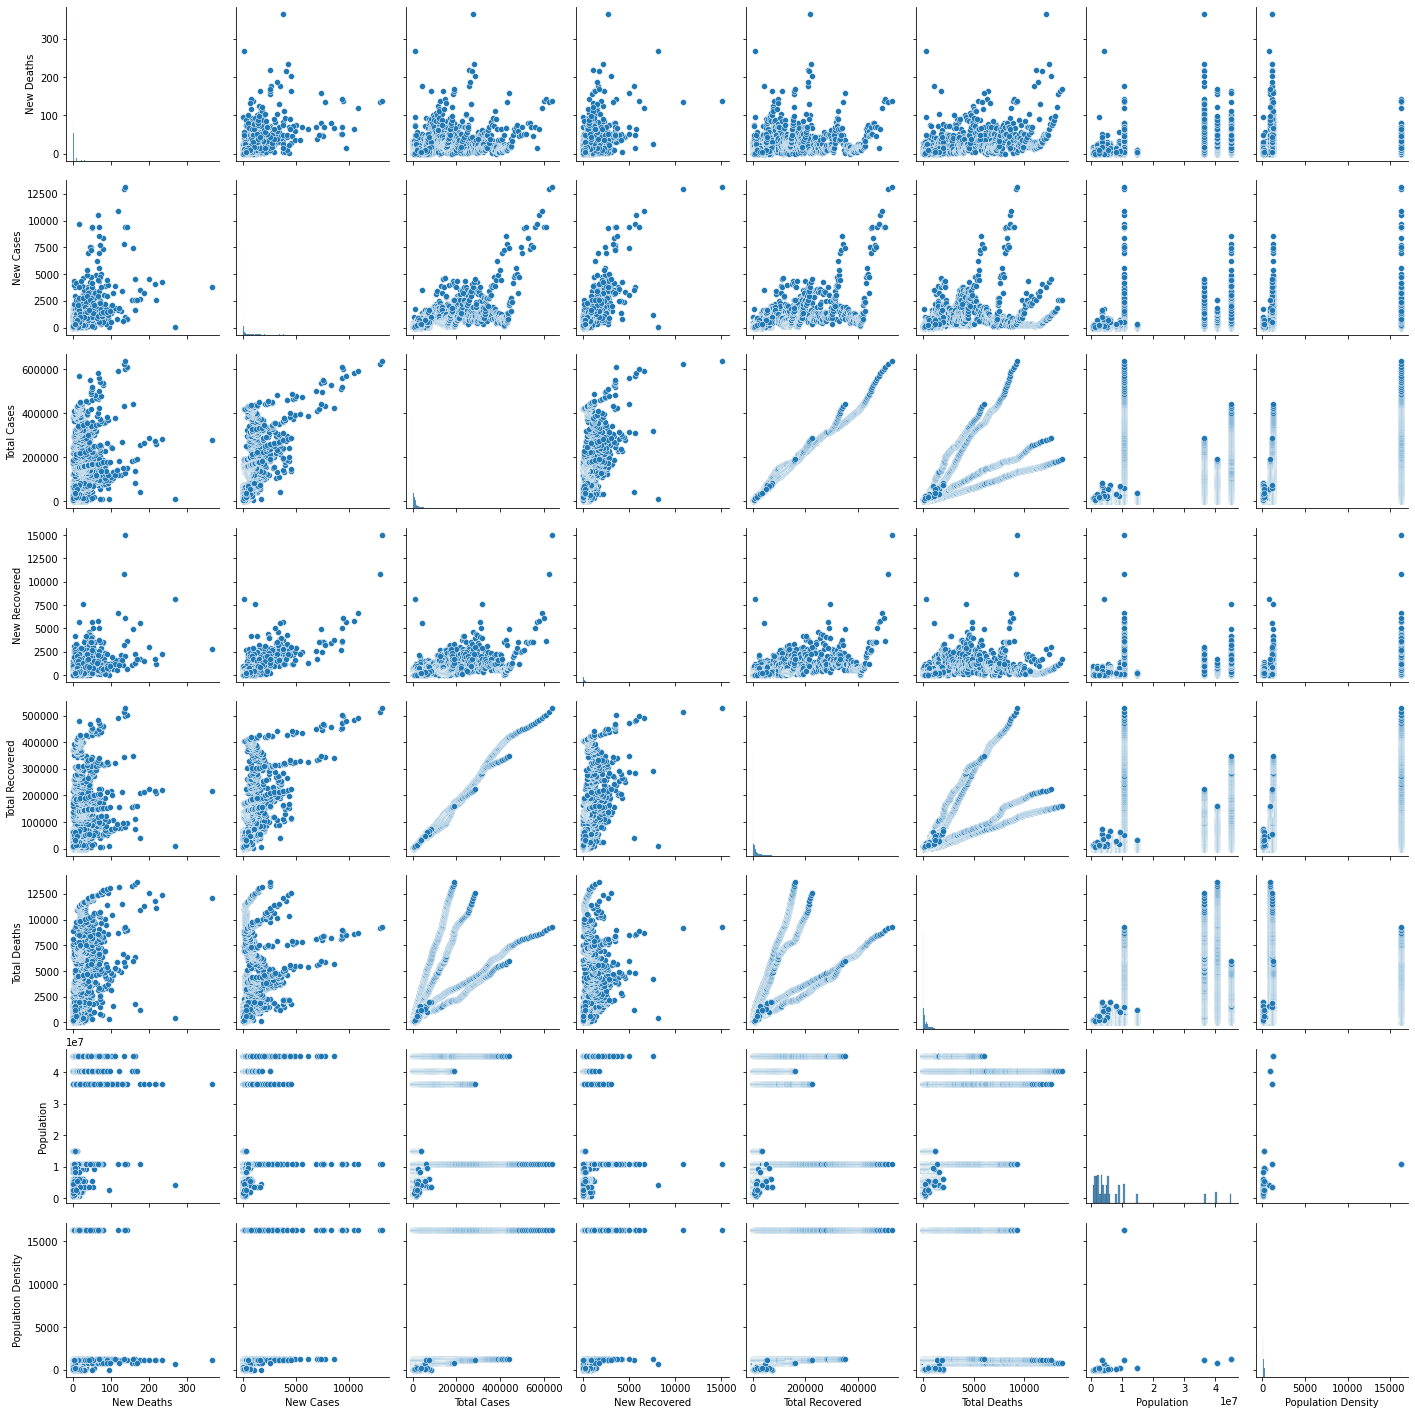

In [ ]:
#Melihat korelasi antar variabel dari sebaran data pada scatter plot 
sns.pairplot(data2)
plt.show()

## Persiapan untuk permodelan data dan evaluasi performa model
### Skala lokasi: Provinsi di Indonesia

In [ ]:
# SPLIT DATA
X = data2.drop('New Deaths', axis = 1)
y = data2['New Deaths']

In [ ]:
#Train_test_split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11841, 7)
(3947, 7)
(11841,)
(3947,)


In [ ]:
#Scalling the Data, supaya nominal angka data bisa seragam (tidak terlalu besar Range-nya)
pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [ ]:
# PREDICT DATA, MODELLING & PERFORMANCE EVALUATION 
def predict_model(model, trainX, testX, trainY, testY):
    m = model
    m.fit(trainX, trainY)
    predict_m = m.predict(testX)
    print('-----------{}-----------'.format(model))
    print_evaluate(testY, predict_m)
    
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')

In [ ]:
#HASIL PERFORMANCE EVALUATION 
model = [LinearRegression(), SVR(), DecisionTreeRegressor()]
for i in model:
    predict_model(i, X_train,X_test, y_train, y_test)

-----------LinearRegression()-----------
MAE: 2.484071559439131
MSE: 53.05080760219056
RMSE: 7.283598533842359
R2 Square 0.6093160909990689
__________________________________
-----------SVR()-----------
MAE: 2.349695015887082
MSE: 67.08076616243825
RMSE: 8.190284864547646
R2 Square 0.5059947788233743
__________________________________
-----------DecisionTreeRegressor()-----------
MAE: 2.595219998310953
MSE: 61.022291895391724
RMSE: 7.811676637917863
R2 Square 0.5506114117496853
__________________________________


## Karena hasil Linear Regression memiliki nilai R2 score yang paling tinggi, maka berikutnya akan kita lakukan prediksi kasus kematian vs kasus riil

MAE: 2.484071559439131
MSE: 53.05080760219056
RMSE: 7.283598533842359
R2 Square 0.6093160909990689
__________________________________


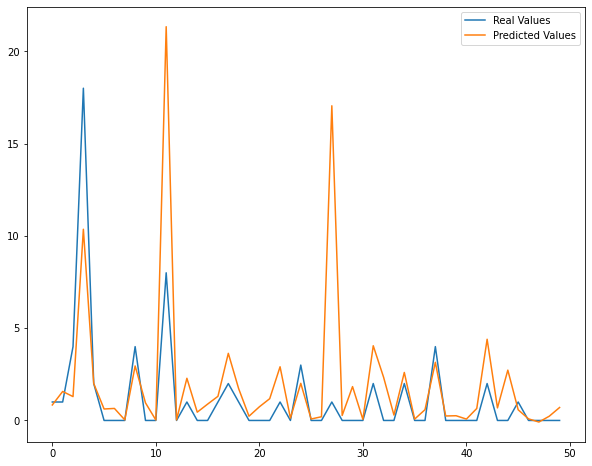

In [ ]:
dct = LinearRegression()
dct.fit(X_train, y_train)

pred_dct = dct.predict(X_test)
print_evaluate(y_test, pred_dct)

df_dct = pd.DataFrame({'Real Values':y_test, 'Predicted Values':pred_dct})
df_dct.head()

plt.figure(figsize=(10,8))
plt.plot(df_dct['Real Values'].values[:50], label = 'Real Values')
plt.plot(df_dct['Predicted Values'].values[:50], label = 'Predicted Values')
plt.legend()
plt.show()

In [ ]:
## Terlihat masih ada beberapa prediksi yang offset karena nilai R2 score yang "hanya" sekitar 60%

In [ ]:
# Ekskalasi lokasi dengan menggunakan location Negara 'Indonesia' sebagai acuan data
id_data = data[data['Location'] == 'Indonesia']
id_data.drop(['Date', 'Location', 'Longitude', 'Latitude','Location Level'], axis=1, inplace=True)
id_data

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4908: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Area (km2),Population,Population Density
56,2,0,0,2,2,0,0,2,1916907,265185520,138.34
61,0,0,0,0,2,0,0,2,1916907,265185520,138.34
66,0,0,0,0,2,0,0,2,1916907,265185520,138.34
71,0,0,0,0,2,0,0,2,1916907,265185520,138.34
77,2,0,0,2,4,0,0,4,1916907,265185520,138.34
...,...,...,...,...,...,...,...,...,...,...,...
16119,29745,558,14416,14771,2313829,61140,1942690,309999,1916907,265185520,138.34
16153,31189,728,15863,14598,2345018,61868,1958553,324597,1916907,265185520,138.34
16187,34379,1040,14835,18504,2379397,62908,1973388,343101,1916907,265185520,138.34
16221,38391,852,21185,16354,2417788,63760,1994573,359455,1916907,265185520,138.34


<AxesSubplot:>

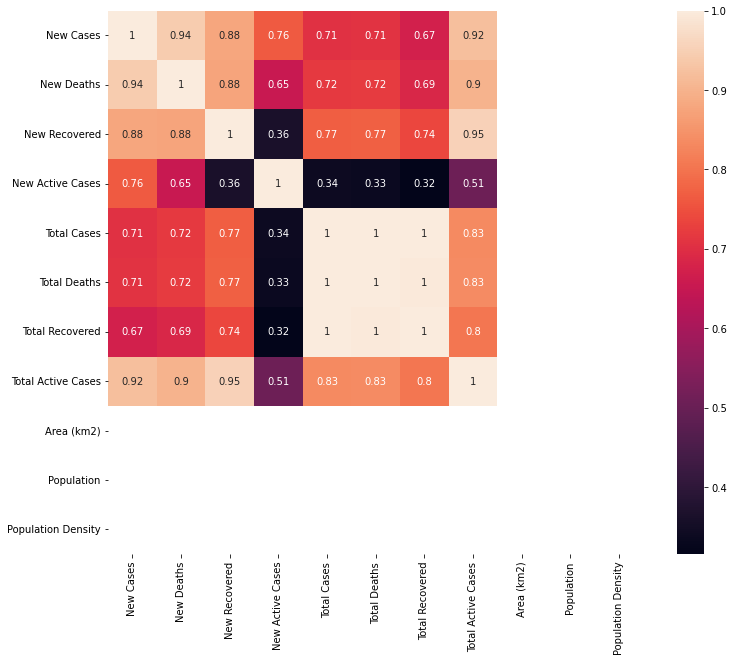

In [ ]:
#Melihat heatmap correlation untuk skala lokasi negara Indonesia
plt.figure(figsize=(12,10))
sns.heatmap(id_data.corr(), annot= True)

In [ ]:
#Ada beberapa variabel yang tidak terlihat display korelasinya,maka kita drop saja 
id_data.drop(['Area (km2)', 'Population', 'Population Density'], axis=1, inplace=True)
id_data.head()

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4908: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases
56,2,0,0,2,2,0,0,2
61,0,0,0,0,2,0,0,2
66,0,0,0,0,2,0,0,2
71,0,0,0,0,2,0,0,2
77,2,0,0,2,4,0,0,4


## Persiapan untuk permodelan data dan evaluasi performa model
### Skala lokasi: Negara Indonesia

In [ ]:
# SPLIT DATA
X = id_data.drop('New Deaths', axis=1)
y = id_data['New Deaths']

In [ ]:
#Train_test_split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(371, 7)
(124, 7)
(371,)
(124,)


In [ ]:
#Scalling the Data, supaya nominal angka data bisa seragam (tidak terlalu besar Range-nya)
pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [ ]:
# PREDICT DATA, MODELLING & PERFORMANCE EVALUATION 
    
def predict_model(model, trainX, testX, trainY, testY):
    m = model
    m.fit(trainX, trainY)
    predict_m = m.predict(testX)
    print('-----------{}-----------'.format(model))
    print_evaluate(testY, predict_m)
    
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')

In [ ]:
#HASIL PERFORMANCE EVALUATION 
model = [LinearRegression(), SVR(), DecisionTreeRegressor()]
for i in model:
    predict_model(i, X_train,X_test, y_train, y_test)

-----------LinearRegression()-----------
MAE: 2.046821493657321e-12
MSE: 6.354635126436062e-24
RMSE: 2.5208401628100228e-12
R2 Square 1.0
__________________________________
-----------SVR()-----------
MAE: 65.55274668927494
MSE: 20389.019157344173
RMSE: 142.79012275834828
R2 Square 0.16946116147006252
__________________________________
-----------DecisionTreeRegressor()-----------
MAE: 29.5
MSE: 2427.967741935484
RMSE: 49.274412649320176
R2 Square 0.9010976696419997
__________________________________


MAE: 2.046821493657321e-12
MSE: 6.354635126436062e-24
RMSE: 2.5208401628100228e-12
R2 Square 1.0
__________________________________


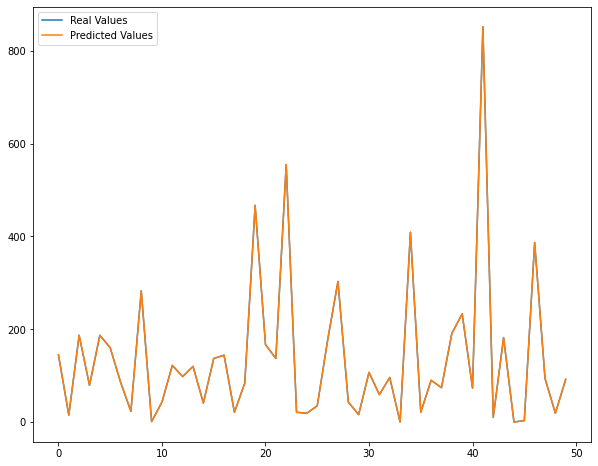

In [ ]:
dct = LinearRegression()
dct.fit(X_train, y_train)

pred_dct = dct.predict(X_test)
print_evaluate(y_test, pred_dct)

df_dct = pd.DataFrame({'Real Values':y_test, 'Predicted Values':pred_dct})
df_dct.head()

plt.figure(figsize=(10,8))
plt.plot(df_dct['Real Values'].values[:50], label = 'Real Values')
plt.plot(df_dct['Predicted Values'].values[:50], label = 'Predicted Values')
plt.legend()
plt.show()

# Visualisasi Mapping Covid 19 di wilayah NKRI

In [ ]:
import geopandas as gpd

In [ ]:
data1.head()

,Date,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,Area (km2),Population,Population Density,Longitude,Latitude
0,2020-01-08,Jawa Timur,9,3,1,5,9,5,10,-6,Province,47803,40479023,846.78,112.732941,-7.723346
1,2020-01-09,Jawa Timur,0,1,23,-24,9,6,33,-30,Province,47803,40479023,846.78,112.732941,-7.723346
2,2020-01-10,Jawa Timur,0,1,14,-15,9,7,47,-45,Province,47803,40479023,846.78,112.732941,-7.723346
3,2020-01-11,Jawa Timur,0,3,8,-11,9,10,55,-56,Province,47803,40479023,846.78,112.732941,-7.723346
4,2020-01-12,Jawa Timur,0,3,1,-4,9,13,56,-60,Province,47803,40479023,846.78,112.732941,-7.723346


In [ ]:
newest

,Date,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,Area (km2),Population,Population Density,Longitude,Latitude
16249,2021-07-09,Aceh,80,13,108,-41,20140,862,15541,3737,Province,57956,5247257,90.54,96.910522,4.225615
16250,2021-07-09,Bali,674,6,0,668,54079,1618,46181,6280,Province,5780,4216171,729.43,115.131714,-8.369472
16251,2021-07-09,Banten,514,4,49,461,61689,1457,50554,9678,Province,9663,10722374,1109.64,106.109004,-6.456736
16252,2021-07-09,Bengkulu,101,0,67,34,11671,194,9530,1947,Province,19919,1999539,100.38,102.338421,-3.533584
16253,2021-07-09,DKI Jakarta,13112,138,15022,-2048,636383,9270,527060,100053,Province,664,10846145,16334.31,106.836118,-6.204699
16254,2021-07-09,Daerah Istimewa Yogyakarta,1665,44,902,719,72560,1892,54352,16316,Province,3133,3631015,1158.90,110.444878,-7.894502
16256,2021-07-09,Jambi,186,2,118,66,13935,284,11892,1759,Province,50058,3493357,69.79,102.723640,-1.697698
16257,2021-07-09,Jawa Barat,7399,160,4974,2265,440379,6008,348694,85677,Province,35378,45161325,1276.55,107.603708,-6.920432
16258,2021-07-09,Jawa Tengah,4530,202,3042,1286,285348,12562,223706,49080,Province,32801,36364072,1108.64,110.201115,-7.259097
16259,2021-07-09,Jawa Timur,2530,168,1727,635,189705,13635,160296,15774,Province,47803,40479023,846.78,112.732941,-7.723346


In [ ]:
#Memanggil Data Geo 
data_geo = gpd.read_file("../input/peta-gadm-indonesia/gadm36_IDN_3.shp")
data_geo.head()

,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,NL_NAME_2,GID_3,NAME_3,VARNAME_3,NL_NAME_3,TYPE_3,ENGTYPE_3,CC_3,HASC_3,geometry
0,IDN,Indonesia,IDN.1_1,Aceh,None,IDN.1.2_1,Aceh Barat,None,IDN.1.2.1_1,Arongan Lambalek,None,None,Kecamatan,Sub-district,1107062,None,"POLYGON ((95.97953 4.31063, 95.98042 4.30927, ..."
1,IDN,Indonesia,IDN.1_1,Aceh,None,IDN.1.2_1,Aceh Barat,None,IDN.1.2.2_1,Bubon,None,None,Kecamatan,Sub-district,1107061,None,"POLYGON ((96.16601 4.27803, 96.16323 4.27509, ..."
2,IDN,Indonesia,IDN.1_1,Aceh,None,IDN.1.2_1,Aceh Barat,None,IDN.1.2.3_1,Johan Pahlawan,None,None,Kecamatan,Sub-district,1107050,None,"POLYGON ((96.13205 4.13408, 96.13216 4.13404, ..."
3,IDN,Indonesia,IDN.1_1,Aceh,None,IDN.1.2_1,Aceh Barat,None,IDN.1.2.4_1,Kaway Xvi,None,None,Kecamatan,Sub-district,1107080,None,"POLYGON ((96.16397 4.19111, 96.16402 4.18973, ..."
4,IDN,Indonesia,IDN.1_1,Aceh,None,IDN.1.2_1,Aceh Barat,None,IDN.1.2.5_1,Meureubo,None,None,Kecamatan,Sub-district,1107081,None,"POLYGON ((96.25119 4.12990, 96.24657 4.12608, ..."


In [ ]:
#Mensinkronkan beberapa penamaan data Provinsi dari data peta
prov = gpd.read_file("../input/peta-gadm-indonesia/gadm36_IDN_3.shp")
prov.drop(["NAME_0"],axis=1,inplace=True)
prov.rename(columns = {"NAME_1":"Provinsi"}, inplace = True)
prov['Provinsi'].replace({"Jakarta Raya":"DKI Jakarta"},inplace=True)

In [ ]:
#Me-rename nama kolom lokasi menjadi provinsi 
newest.rename(columns={
    'Location':'Provinsi'
},inplace=True)
newest

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:5042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Date,Provinsi,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,Area (km2),Population,Population Density,Longitude,Latitude
16249,2021-07-09,Aceh,80,13,108,-41,20140,862,15541,3737,Province,57956,5247257,90.54,96.910522,4.225615
16250,2021-07-09,Bali,674,6,0,668,54079,1618,46181,6280,Province,5780,4216171,729.43,115.131714,-8.369472
16251,2021-07-09,Banten,514,4,49,461,61689,1457,50554,9678,Province,9663,10722374,1109.64,106.109004,-6.456736
16252,2021-07-09,Bengkulu,101,0,67,34,11671,194,9530,1947,Province,19919,1999539,100.38,102.338421,-3.533584
16253,2021-07-09,DKI Jakarta,13112,138,15022,-2048,636383,9270,527060,100053,Province,664,10846145,16334.31,106.836118,-6.204699
16254,2021-07-09,Daerah Istimewa Yogyakarta,1665,44,902,719,72560,1892,54352,16316,Province,3133,3631015,1158.90,110.444878,-7.894502
16256,2021-07-09,Jambi,186,2,118,66,13935,284,11892,1759,Province,50058,3493357,69.79,102.723640,-1.697698
16257,2021-07-09,Jawa Barat,7399,160,4974,2265,440379,6008,348694,85677,Province,35378,45161325,1276.55,107.603708,-6.920432
16258,2021-07-09,Jawa Tengah,4530,202,3042,1286,285348,12562,223706,49080,Province,32801,36364072,1108.64,110.201115,-7.259097
16259,2021-07-09,Jawa Timur,2530,168,1727,635,189705,13635,160296,15774,Province,47803,40479023,846.78,112.732941,-7.723346


In [ ]:
#Merge Peta
covid_peta = prov.merge(newest.sort_values(by='Provinsi'),on='Provinsi')

# Visualisasi Peta Covid 19 di NKRI 

Text(0.5, 0.98, 'Peta Covid-19 Indonesia')

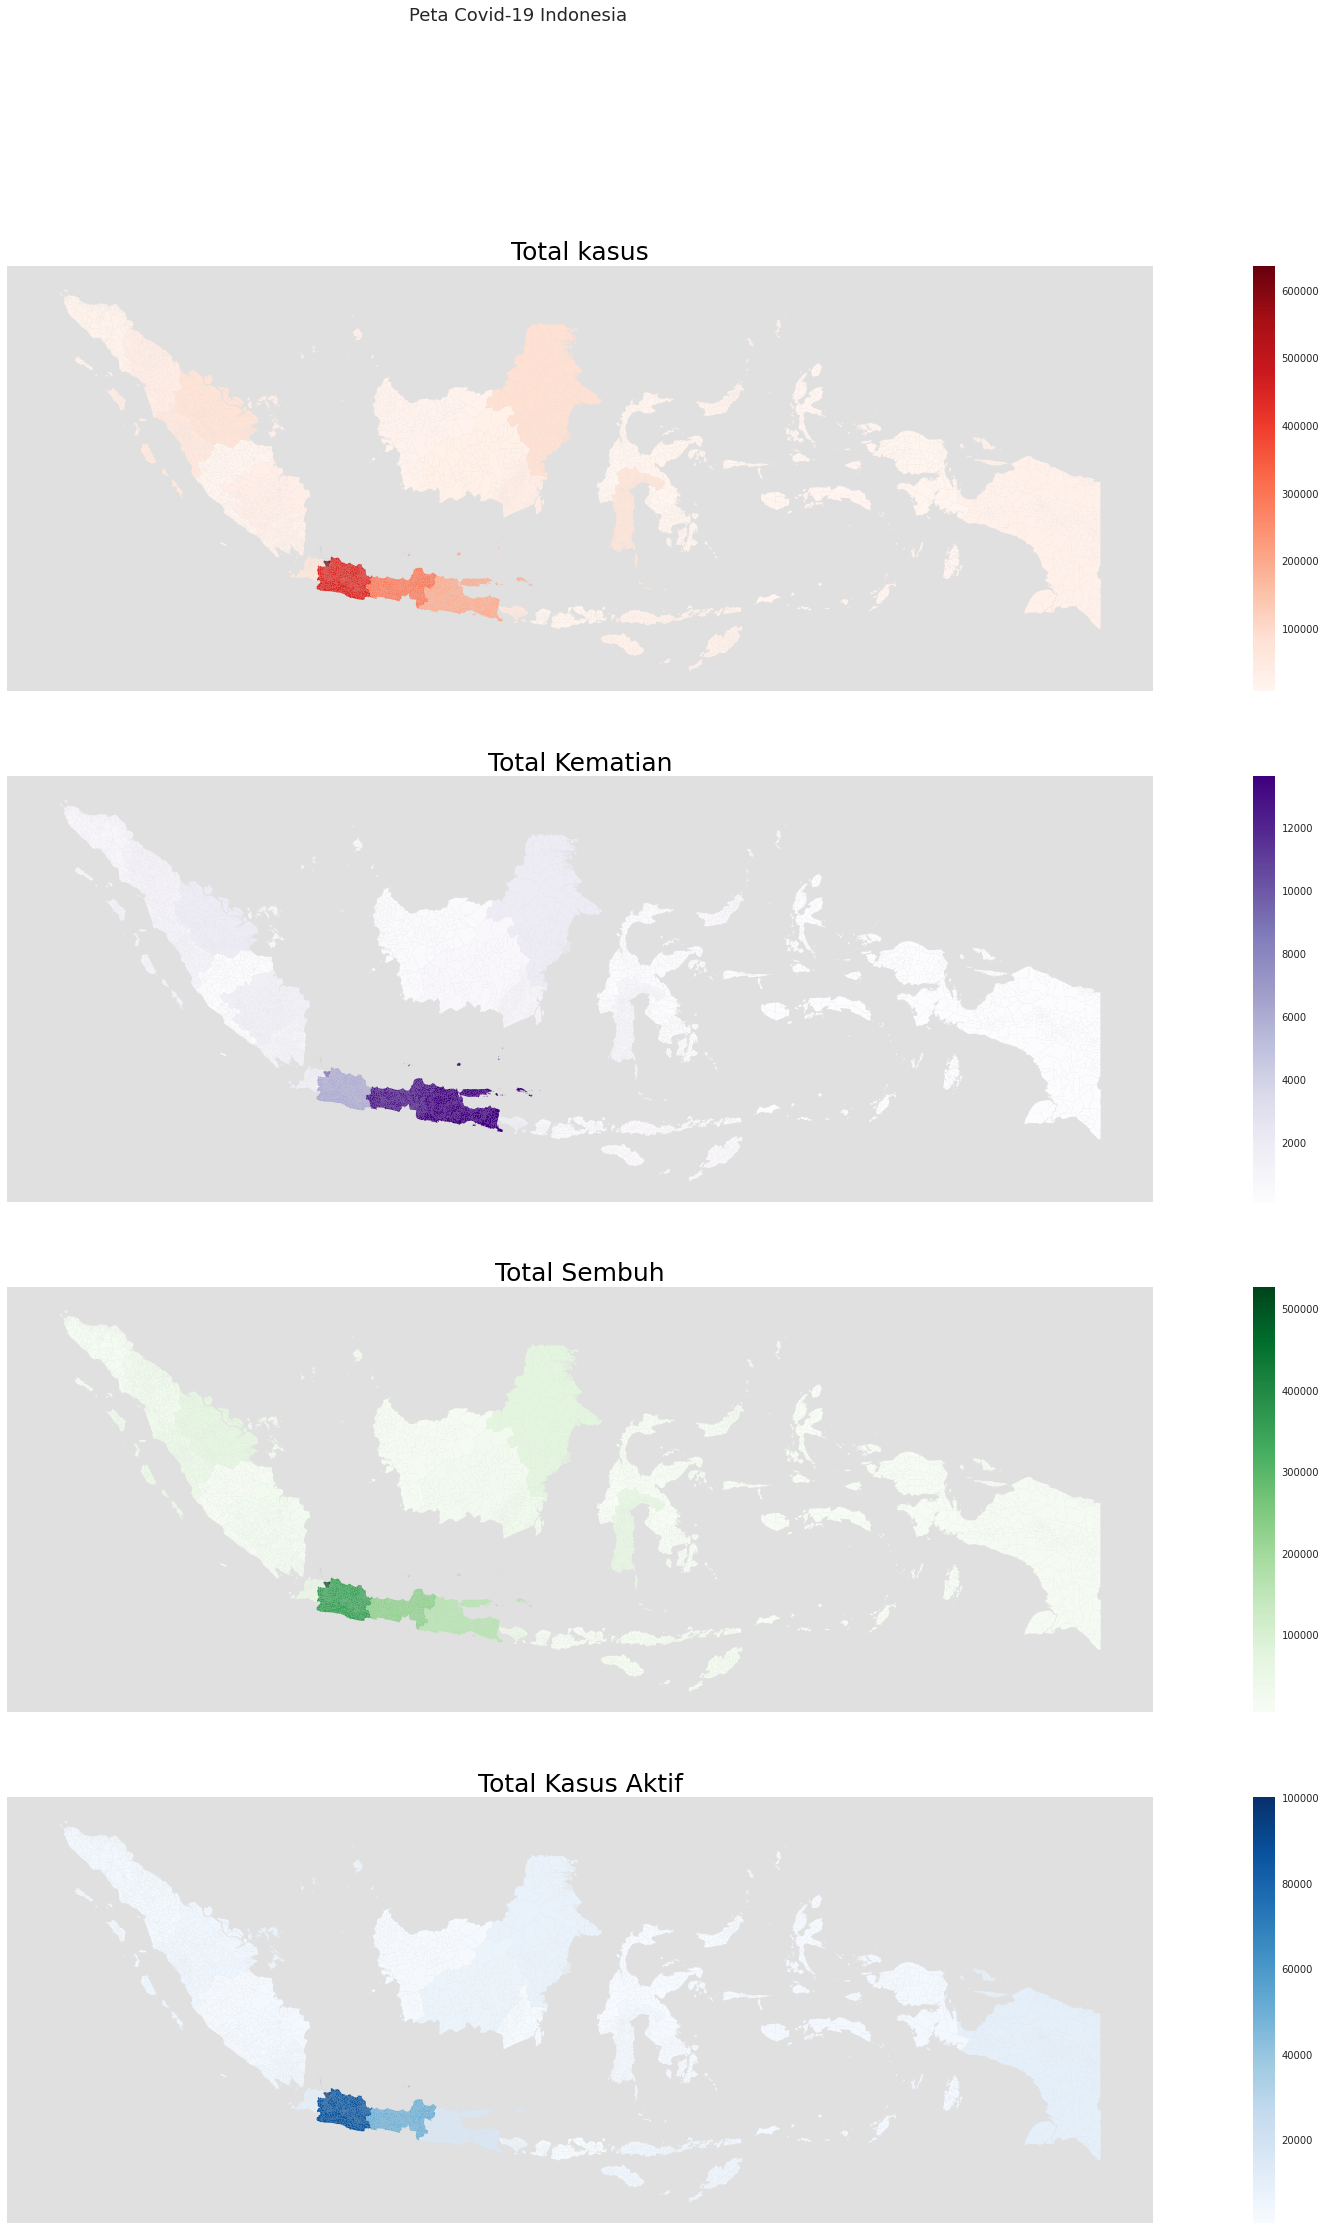

In [ ]:
fig,ax = plt.subplots(4,figsize=(36,36))
plt.style.use('seaborn')
covid_peta.plot(column='Total Cases',cmap='Reds',figsize=(9,36),legend=True,ax=ax[0])
ax[0].set_title('Total kasus',fontsize=25)
covid_peta.plot(column='Total Deaths',cmap='Purples',figsize=(9,36),legend=True,ax=ax[1])
ax[1].set_title('Total Kematian',fontsize=25)
covid_peta.plot(column='Total Recovered',cmap='Greens',figsize=(9,36),legend=True,ax=ax[2])
ax[2].set_title('Total Sembuh',fontsize=25)
covid_peta.plot(column='Total Active Cases',cmap='Blues',figsize=(9,36),legend=True,ax=ax[3])
ax[3].set_title('Total Kasus Aktif',fontsize=25)

#add background color
ax[0].set_facecolor('#e0e0e0')
ax[1].set_facecolor('#e0e0e0')
ax[2].set_facecolor('#e0e0e0')
ax[3].set_facecolor('#e0e0e0')

for i in np.arange(4):
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['left'].set_visible(False)
    ax[i].spines['bottom'].set_visible(False)
    for item in ax[i].get_xticklabels():
        item.set_visible(False)
    for item in ax[i].get_yticklabels():
        item.set_visible(False)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
fig.suptitle('Peta Covid-19 Indonesia', fontsize=18)